## Initialisation code
Don't worry about it, just ignore this.

In [16]:
from matplotlib import pyplot
from pandas import DataFrame, scatter_matrix
from pymongo import MongoClient
from scipy import stats
%matplotlib inline

In [17]:
MIN_SALIENCE = 0.01
news_collection = MongoClient().fakeko['news']

# news dataframe
news_list = news_collection.find({'skip': {'$ne': True}, 'text_analysed': True})
def get_news_fields(news):
    return [news['short_url'], news['domain'], news['sentiment_score'], 
            news['sentiment_magnitude'], news['language'], news['authors']]
news_data = [get_news_fields(news) for news in news_list]
df = DataFrame(data=news_data, columns=['short_url', 'domain', 'sentiment_score', 
                                        'sentiment_magnitude', 'language', 'authors'])
df['domain'] = df['domain'].astype('category')
df['language'] = df['language'].astype('category')

# entities dataframe
news_list = news_collection.find({'skip': {'$ne': True}, 'text_analysed': True})
def get_entities_fields(entity):
    return [entity['name'], entity['type'], entity['salience']]
entities = []
for news in news_list:
    for entity in news['entities']:
        if entity['salience'] >= MIN_SALIENCE:
            entities.append(get_entities_fields(entity))
entities_df = DataFrame(data=entities, columns=['name', 'type', 'salience'])

## Most common websites
On the left the web site, on the right the frequency in %, filtered by 1% or above.

In [18]:
(df['domain'].value_counts() / df['domain'].count() * 100)[lambda x: x > 1]

www.parlamentnilisty.cz            5.172414
miaistok.su                        3.879310
protiproud.parlamentnilisty.cz     3.663793
cz.sputniknews.com                 2.586207
ria.ru                             2.370690
sputniknews.com                    2.370690
baltnews.lv                        2.370690
aeronet.cz                         2.370690
ac24.cz                            1.939655
prvnizpravy.parlamentnilisty.cz    1.293103
www.rt.com                         1.293103
www.hlavnespravy.sk                1.293103
tvzvezda.ru                        1.293103
tass.ru                            1.077586
ukraina.ru                         1.077586
www.facebook.com                   1.077586
www.nwoo.org                       1.077586
www.bezpolitickekorektnosti.cz     1.077586
lenta.ru                           1.077586
russia-insider.com                 1.077586
www.osce.org                       1.077586
Name: domain, dtype: float64

## Most common terms
On the left the term, on the right the frequency in %, first 30 most frequent.

Terms can refer to people, events, locations, organisations. 

In [19]:
terms = entities_df['name'][entities_df['type'] != 'OTHER']
(terms.value_counts() / terms.count() * 100).nlargest(30)

Russian               2.795699
Ukrainian             2.322581
people                1.913978
United States         1.053763
Ukraine               0.967742
Vladimir Putin        0.774194
Russian Federation    0.709677
Moscow                0.709677
European Union        0.688172
country               0.666667
countries             0.602151
Germany               0.602151
Donald Trump          0.580645
Syrian                0.580645
Kiev                  0.559140
war                   0.537634
citizens              0.473118
territory             0.473118
European              0.451613
children              0.451613
Donbass               0.430108
authorities           0.430108
Russia                0.408602
President             0.408602
elections             0.408602
Hillary Clinton       0.387097
NATO                  0.387097
Aleppo                0.387097
Czech Republic        0.365591
Europe                0.344086
Name: name, dtype: float64

## Most mentioned people
On the left the person type or name, on the right the frequency in %.

In [20]:
people = entities_df['name'][entities_df['type'] == 'PERSON']
(people.value_counts() / people.count() * 100).nlargest(30)

people             5.361446
Vladimir Putin     2.168675
Donald Trump       1.626506
citizens           1.325301
children           1.265060
authorities        1.204819
President          1.144578
Hillary Clinton    1.084337
soldiers           0.903614
migrants           0.783133
population         0.722892
man                0.722892
refugees           0.722892
Ukrainians         0.722892
troops             0.602410
Putin              0.542169
representatives    0.542169
journalists        0.542169
head               0.542169
residents          0.542169
families           0.542169
men                0.481928
representative     0.481928
militants          0.481928
civilians          0.481928
Americans          0.421687
Angela Merkel      0.421687
politicians        0.421687
fighters           0.421687
experts            0.421687
Name: name, dtype: float64

## Most mentioned locations
On the left the location type or name, on the right the frequency in %.

In [21]:
locations = entities_df['name'][entities_df['type'] == 'LOCATION']
(locations.value_counts() / locations.count() * 100).nlargest(30)

Russian               8.795670
Ukrainian             7.307172
United States         3.315291
Ukraine               3.044655
Russian Federation    2.232747
country               2.097429
Germany               1.894452
Syrian                1.826793
Kiev                  1.759134
countries             1.623816
Moscow                1.488498
territory             1.488498
European              1.420839
Donbass               1.353180
Aleppo                1.217862
Czech Republic        1.150203
Russia                1.150203
Europe                1.082544
region                1.082544
world                 1.014885
American              1.014885
city                  0.947226
Donetsk               0.879567
Crimean               0.879567
state                 0.811908
Finland               0.676590
Crimea                0.676590
village               0.676590
US                    0.676590
states                0.676590
Name: name, dtype: float64

## Most mentioned organisations
On the left the organisation type or name, on the right the frequency in %.

In [22]:
organisations = entities_df['name'][entities_df['type'] == 'ORGANIZATION']
(organisations.value_counts() / organisations.count() * 100).nlargest(30)

European Union    3.686636
NATO              2.073733
government        1.612903
army              1.497696
RIA Novosti       1.497696
group             1.382488
EU                1.382488
Moscow            1.267281
LNR               1.267281
schools           1.152074
Government        1.036866
party             1.036866
military          1.036866
Kremlin           0.921659
CIA               0.921659
forces            0.921659
United Nations    0.921659
team              0.806452
ATO               0.806452
DNI               0.806452
NGOs              0.806452
organization      0.806452
OSCE              0.691244
APU               0.691244
organizations     0.691244
parties           0.691244
TASS              0.691244
Militia           0.576037
newspaper         0.576037
HSP               0.576037
Name: name, dtype: float64

## Most mentioned events
On the left the event, on the right the frequency in %.

In [23]:
events = entities_df['name'][entities_df['type'] == 'EVENT']
(events.value_counts() / events.count() * 100).nlargest(30)

war                  6.393862
elections            4.859335
conflict             3.836317
meeting              3.324808
attack               3.324808
election             2.301790
interview            2.046036
opening              1.790281
introduction         1.790281
incident             1.790281
press conference     1.534527
coup                 1.534527
visit                1.278772
crisis               1.278772
attacks              1.278772
speech               1.023018
meetings             1.023018
ceasefire            1.023018
collapse             1.023018
bombings             0.767263
crash                0.767263
death                0.767263
fight                0.767263
terrorist attacks    0.767263
bombing              0.767263
migration            0.767263
conference           0.767263
assault              0.767263
Convention           0.767263
exercise             0.767263
Name: name, dtype: float64

## Most mentioned other terms
On the left the term, on the right the frequency in %.

In [24]:
others = entities_df['name'][entities_df['type'] == 'OTHER']
(others.value_counts() / others.count() * 100).nlargest(30)

&quot          1.686835
situation      0.953429
information    0.843418
media          0.770077
part           0.770077
number         0.660066
relations      0.623396
fact           0.550055
case           0.513385
regime         0.476714
side           0.440044
policy         0.440044
one            0.440044
work           0.403374
fire           0.403374
right          0.403374
way            0.403374
sanctions      0.403374
question       0.330033
law            0.330033
threat         0.330033
interest       0.330033
ships          0.330033
propaganda     0.293363
problem        0.293363
data           0.293363
head           0.293363
convoy         0.293363
power          0.293363
democracy      0.293363
Name: name, dtype: float64

## Authors
Authors on the left, number of articles post on the right. Most of the articles do not have cleary specified authors.

In [25]:
df['authors'].value_counts()

Vedoucí kolotoče                         10
Jana Petrova                              3
Világfigyelő                              3
admin                                     2
Alena Novotná                             2
Caroline B. Glick                         2
Baxter Dmitry                             2
Eliot Higgins                             2
Олесь Бузина                              2
Svět kolem nás                            2
Tyler Durden                              2
Virginia Hale                             2
Redakce                                   2
Juraj Pokorný                             2
Václav Dvořák                             2
Orosz Hírek                               1
ČTK/Pavlíček Luboš                        1
Martin Walsh                              1
Justin Seitz                              1
Игорь Скрыпач                             1
Volodymyr Petrov                          1
Christopher Black                         1
Алексей Громов                  

## Most common languages
On the left the language, on the right the frequency in %.

In [26]:
(df['language'].value_counts() / df['language'].count() * 100)

en    32.543103
ru    30.818966
cs    25.431034
de     2.801724
sk     2.586207
hu     1.508621
ro     0.862069
bg     0.862069
uk     0.646552
pl     0.431034
nl     0.431034
lt     0.431034
sv     0.215517
lv     0.215517
be     0.215517
Name: language, dtype: float64

## Sentiment
Sentiment score is a value from -1 to 1, where -1 means very negative, 0 neutral and 1 very positive. Sentiment magnitude is how strong is the sentiment in the news. Each bullet represents a news.

The chart shows that the sentiment of the news is well distribuited between negative and positive around the neutral, which means that the sentiment analysis is probably not very useful to spot fake news.

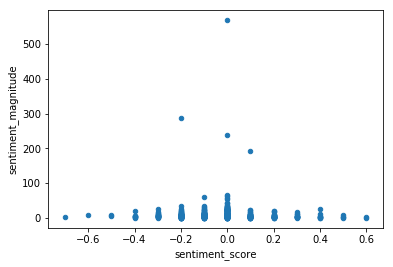

In [27]:
df.plot.scatter(x='sentiment_score', y='sentiment_magnitude')